In [1]:
import torch
from torch import nn
import dltools

In [2]:
batch_size,num_steps = 32,25
train_iter,vocab = dltools.load_data_time_machine(batch_size,num_steps)


In [3]:
def get_lstm_params(vocab_size,num_hiddens,device):
    num_inputs = num_outputs = vocab_size
    def normal(shape):
        return torch.randn(size=shape,device=device) *  0.01
    
    def three():
        return (normal((num_inputs,num_hiddens)),normal((num_hiddens,num_hiddens)),
                torch.zeros(num_hiddens,device=device))
    
    W_xi,W_hi,bi = three()
    W_xf,W_hf,bf = three()
    W_xo,W_ho,bo = three()
    W_xc,W_hc,bc = three()
    W_hq = normal((num_hiddens,num_outputs))
    bq =   torch.zeros(vocab_size,device=device)
    params = [W_xi,W_hi,bi, W_xf,W_hf,bf, W_xo,W_ho,bo,W_xc,W_hc,bc, W_hq,bq]
    for p in params:
        p.requires_grad_(True)
    return params

In [4]:
def init_lstm_state(batch_size, num_hiddens, device):
    return (torch.zeros((batch_size, num_hiddens), device=device),
            torch.zeros((batch_size, num_hiddens), device=device))


In [5]:
def lstm(inputs,state,params):
    [W_xi,W_hi,bi, W_xf,W_hf,bf, W_xo,W_ho,bo,W_xc,W_hc,bc, W_hq,bq] = params
    (H,C) = state
    outputs = []
    for X in inputs:
       I =  torch.sigmoid((X@W_xi) + (H@W_hi)+bi)
       F =  torch.sigmoid((X@W_xf) + (H@W_hf)+bf)
       O =  torch.sigmoid((X@W_xo) + (H@W_ho)+bo)
       C_tilda = torch.tanh((X@W_xc)+(H@W_hc) + bc)

       C = F*C + I *C_tilda
       H = O*torch.tanh(C)
       Y = (H @W_hq) + bq
       outputs.append(Y)

    return torch.cat(outputs,dim=0),(H,C)

perplexity 1.0, 16069.0 tokens/sec on cuda:0
time travelleryou can show black is white by argument said filby
travelleryou can show black is white by argument said filby


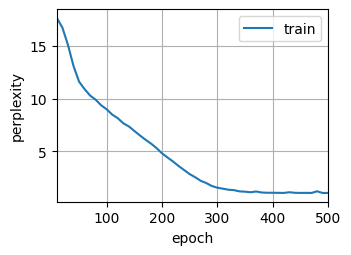

In [6]:
vocab_size,num_hiddens,device  = len(vocab),256,dltools.try_gpu()
num_epoche ,lr = 500,1
model = dltools.RNNModelScratch(len(vocab),num_hiddens,device ,get_lstm_params,init_lstm_state,lstm)
dltools.train_ch8(model,train_iter,vocab,lr,num_epoche,device)